In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
from scipy.optimize import curve_fit
from scipy import stats

In [19]:
def load(data):
    d = pd.read_excel(data)
    df1 = pd.DataFrame(d.iloc[13:21,1:13])     
    mean = df1.mean(0)
    mean2 = list(map(lambda x: x - mean[-1], mean)) 
    del mean2[0]
    del mean2[-1]
    return mean2

In [20]:
gain_reps = 9; conc_range = 10; concentration = []; col = []
arr = np.zeros((conc_range, gain_reps))

for j in range(conc_range):
    initial = 10 / 2**1
    concentration_ = initial / 2**(j)
    concentration.append(concentration_)
    
for i in range(gain_reps):    
    a = 'C:\Clariostar\Writeup data\Fluostar data\\f Coumarin 30 10uM Gain '
    b = '.xlsx'
    gain = 50*i + 700
    c = a + str(gain) + b        
    
    col.append(gain)
    
    show = load(c) 
    
    for x in range(len(show)):
        arr[x, i] = show[x]

df = pd.DataFrame(arr, index = concentration, columns = col)

print(df, "\n", "\n", "\n", df.shape)

               700        750        800        850        900        950   \
5.000000  11038.750  16766.750  25010.500  35901.250  51334.625  70540.000   
2.500000   5895.500   8963.750  13396.125  19226.875  27512.000  37880.750   
1.250000   3106.875   4725.750   7054.625  10150.250  14515.750  20042.125   
0.625000   1604.875   2438.375   3637.875   5249.125   7476.250  10351.500   
0.312500    815.750   1240.625   1849.125   2661.625   3820.500   5266.375   
0.156250    417.375    634.875    947.875   1355.500   1948.375   2689.625   
0.078125    208.750    314.125    470.500    678.375    968.000   1338.500   
0.039062    106.125    163.750    239.875    346.125    492.375    684.000   
0.019531     53.250     82.000    116.625    169.125    244.000    333.750   
0.009766     23.125     40.250     56.875     83.875    114.250    162.500   

               1000        1050        1100  
5.000000  97731.500  130516.375  177537.000  
2.500000  52603.125   70206.875   95761.875  
1.2

0.9999128120487657
0.9998966872238252
0.9999265350884042
0.9999302330799534
0.9999254572374868
0.999935169373185
0.9998726316920833
0.9998874278894774
0.9997419400924071
0.9996985061462363


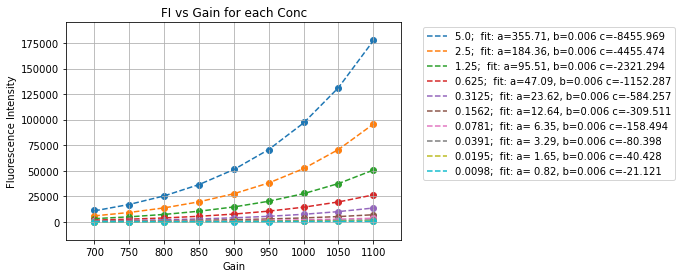

In [21]:
### scipy.optimise curve_fit
### FI vs Gain for each Concentration

def func(x, a, b, c):
    return a*np.exp(b*x) + c

popt5_alist = []; popt5_clist = []
for i in range(df.shape[0]):
    x = np.array(df.columns)[np.isfinite(df.iloc[i, :])].astype(float) # subset data for regression
    y = np.array(df.iloc[i,:])[np.isfinite(df.iloc[i, :])].astype(float)
    
    plt.scatter(x, y)
    
    popt5, pcov5 = curve_fit(func, x, y, p0 = [1, 0.006, -50], maxfev = 30000)
#     print(np.round(popt1, 3))
    popt5_alist.append(popt5[0])
    popt5_clist.append(popt5[2])
   

    plt.plot(x, func(x, *popt5), '--', label = str(round(initial*0.5**i, 4)) + ';  fit: a=%5.2f, b=%5.3f c=%5.3f'% tuple(popt5))
    plt.savefig('1')

    residuals = y - func(x, *popt5)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r_squared = 1 - (ss_res/ss_tot)

    print(r_squared) #popt1_list)
   

plt.title("FI vs Gain for each Conc")
plt.xlabel("Gain")
plt.xticks(x, col)
plt.ylabel("Fluorescence Intensity")
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
# plt.legend(df.index, bbox_to_anchor=(1.05, 1), loc=2)
plt.margins(0.10) 

plt.show()


0.9991905662073065
0.9997760765632708
0.9996074291026338
0.9996796518887774
0.9995140411366493
0.9995912259797687
0.9996640036410135
0.9996308481915805
0.9995737133982658


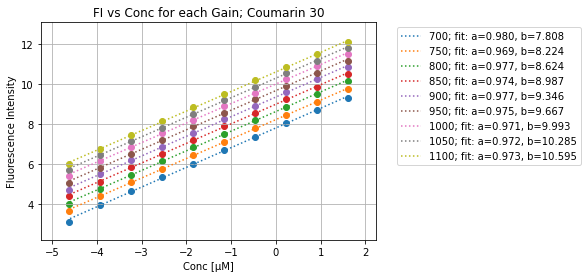

0.9742095674059268


In [23]:
conc_fit_array = np.zeros((0, 2)); a_list = []; b_list = []

for k in range(df.shape[1]): 
    x = np.log(np.array(df.index))
    y = np.log(np.array(df.iloc[:, k]))
   
    fit = np.polyfit(x, y, 1) # linear regression, generates y=mx+c as log(FI)=(B)Gain+log(a)
    fit_conc_list = [fit]
    a = fit[0]
    b = fit[1]
    fit_equation = a*x + b
    
    conc_fit_array = np.append(conc_fit_array, fit_conc_list, axis = 0)
    a_list.append(a); b_list.append(b)
    
    plt.plot(x, fit_equation, ':', label = str(50*k + 700) + '; fit: a=%5.3f, b=%5.3f' % tuple(fit)) #plot line graph of the ith row
    plt.scatter(x, y) #plot scatter graph of the ith row

    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    print(r_value**2)
    
plt.title('FI vs Conc for each Gain; Coumarin 30'); plt.xlabel('Conc [µM]'); plt.ylabel('Fluorescence Intensity')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2); plt.grid(); plt.margins(0.10) 
plt.show() 
a_array = np.array(a_list)
a_mean = np.mean(a_array)
print(a_mean)

[ 7.52960446e+01  5.74296984e-03 -1.82701402e+03]

 0.999914992065538


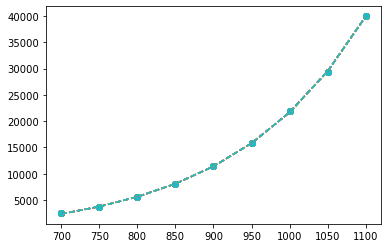

In [24]:
def func(x, a, b, c):
    return a*np.exp(b*x) + c


for i in range(df.shape[0]):
    m = df.columns
    delta = np.exp(b_list)
    
    popt9, pcov9 = curve_fit(func, m, delta, p0 = [1, 0.006, -50], maxfev = 30000)

    plt.plot(m, func(m, *popt9), '--', label = 'fit: a=%5.2f, b=%5.3f c=%5.3f'% tuple(popt9))
    
    plt.scatter(m, delta)

print(popt9)
residuals_test1_1 = delta - func(m, *popt9)
ss_res1_1 = np.sum(residuals_test1_1**2)
ss_tot1_1 = np.sum((delta - np.mean(delta))**2)
r_squared1_1 = 1 - (ss_res1_1 / ss_tot1_1)
print('\n', r_squared1_1)

                  700           750           800           850   \
5.000000  11355.677172  18047.810491  26965.895132  38850.331658   
2.500000   5780.251508   9186.672203  13726.143642  19775.543525   
1.250000   2942.255842   4676.187519   6986.863160  10066.120546   
0.625000   1497.663108   2380.266676   3556.443681   5123.843130   
0.312500    762.338459   1211.600140   1810.296175   2608.131733   
0.156250    388.044496    616.727072    921.474522   1327.587704   
0.078125    197.521887    313.925584    469.047721    675.766906   
0.039062    100.542325    159.793978    238.754040    343.977961   
0.019531     51.177919     81.338116    121.530260    175.091199   
0.009766     26.050515     41.402618     61.861169     89.124686   

                  900           950            1000           1050  \
5.000000  54687.794209  75793.146535  103918.605104  141399.212271   
2.500000  27837.107394  38580.125426   52896.508488   71974.836696   
1.250000  14169.606935  19638.003513   26

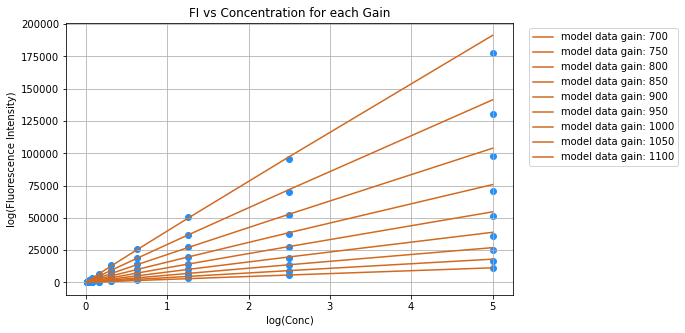

In [26]:
model = list(df.index) # concentrations
model = np.array(model, dtype = float)
model_array = [] # empty array for model
index_gain = []

for gn in range(gain_reps): 
    gain = 50*gn + 700
    result = list(map(lambda uM: (popt9[0]*np.exp(popt9[1]*gain)+popt9[2])*uM**(a_mean), model))
    model_array.append(result)
    index_gain.append(gain)


model_df = pd.DataFrame(model_array, index = index_gain, columns = model)
model_df = model_df.T # transpose df
print(model_df)

plt.figure(figsize=(8,5))

for i in range(df.shape[1]):
    gain = 50*i + 700
  
    x = df.index
    y = df.iloc[:, i]
    
    x_model = model_df.index
    y_model = model_df.iloc[:, i]
    
    plt.scatter(x, y, c = 'dodgerblue')
    plt.plot(x_model, y_model, linewidth = 1.5, c = 'chocolate', label = 'model data gain: %2.0f' % gain)


plt.title('FI vs Concentration for each Gain')
plt.xlabel('log(Conc)')
plt.ylabel('log(Fluorescence Intensity)')
plt.legend(bbox_to_anchor = (1.025, 1))
plt.grid()
    
plt.show()

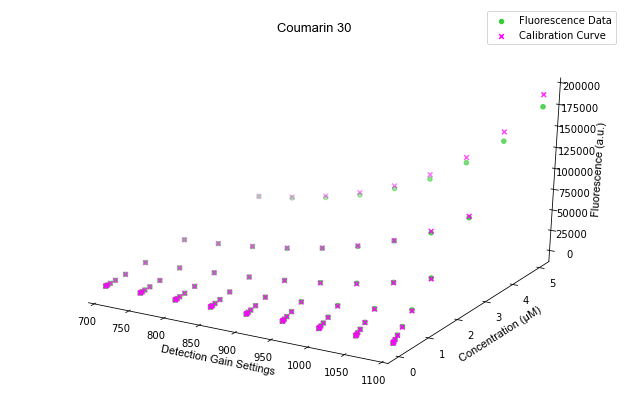

In [27]:
fig = plt.figure(figsize=(11,7))
ax = plt.axes(projection='3d')

x,y = np.meshgrid(df.columns, df.index)
X,Y = np.meshgrid(model_df.columns, model_df.index)
z1 = np.array(df.values)
z2 = np.array(model_df.values)

ax.scatter3D(x, y, z1, label = 'Fluorescence Data', s=20, c='limegreen', marker='o')
ax.scatter3D(X, Y, z2, label = 'Calibration Curve', s=22, c='magenta', marker='x')

ax.set_title('Coumarin 30', fontname="Arial", fontsize=13)
ax.set_xlabel('Detection Gain Settings', fontname="Arial", fontsize=11)
ax.set_ylabel('Concentration (\u03BCM)', fontname="Arial", fontsize=11)
ax.set_zlabel('Fluorescence (a.u.)', fontname="Arial", fontsize=11)
ax.legend(loc=1)

# plt.rc('grid', linestyle=":", color='grey'); #ax.set_xticklabels(df.columns, fontsize=9.5); 
ax.grid(False)
ax.set_xlim(700,1100)

ax.xaxis.pane.fill = False; ax.yaxis.pane.fill = False; ax.zaxis.pane.fill = False
# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w'); ax.yaxis.pane.set_edgecolor('w'); ax.zaxis.pane.set_edgecolor('w')

plt.savefig('Fluostar Coumarin 30 3D.png', dpi=300)

plt.show()

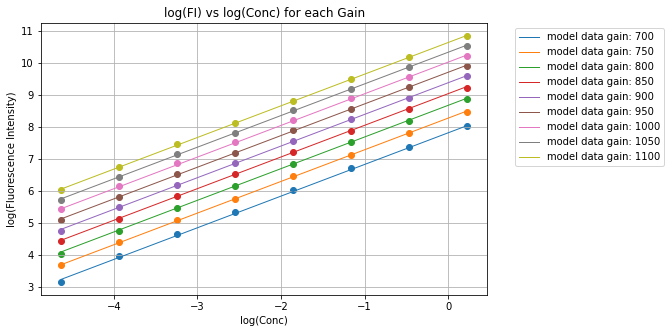

Model dataframe: 
 
                  700          750          800           850           900   \
1.250000  3104.641961  4912.281253  7325.738050  10548.047798  14850.291835   
0.625000  1563.314821  2473.535494  3688.810179   5311.375566   7477.732250   
0.312500   787.193261  1245.526778  1857.467526   2674.495882   3765.345505   
0.156250   396.384159   627.173921   935.311237   1346.718592   1896.006208   
0.078125   199.595714   315.807844   470.967647    678.128158    954.717047   
0.039062   100.504645   159.022229   237.151566    341.465397    480.739270   
0.019531    50.608219    80.074228   119.415560    171.941861    242.071980   
0.009766    25.483318    40.320664    60.130642     86.579793    121.893190   

                  950           1000          1050          1100  
1.250000  20594.402487  28263.611138  38503.100748  52174.282773  
0.625000  10370.128033  14231.889775  19387.893612  26271.895614  
0.312500   5221.785652   7166.341398   9762.601229  13228.979153  

In [14]:
plt.figure(figsize=(8,5))
for i in range(df.shape[1]):
    gain = 50*i + 700
    
    x = np.log(df.index)
    y = np.log(df.iloc[:, i])
    
    x_model = np.log(model_df.index)
    y_model = np.log(model_df.iloc[:, i])
    
    plt.scatter(x, y)
    plt.plot(x_model, y_model, linewidth = 1, label = 'model data gain: %2.0f' % gain)


plt.title('log(FI) vs log(Conc) for each Gain'); plt.xlabel('log(Conc)'); plt.ylabel('log(Fluorescence Intensity)')
plt.legend(bbox_to_anchor = (1.05, 1)); plt.grid()
    
plt.show()
print('Model dataframe:', "\n", "\n", model_df)